In [426]:
import kagglehub

# Download latest version
directory_path = kagglehub.dataset_download("vinicius150987/titanic3")

print("directory_path to dataset files:", directory_path)

directory_path to dataset files: /home/mohamed/.cache/kagglehub/datasets/vinicius150987/titanic3/versions/1


In [427]:
import os
files_path = os.listdir(directory_path)
files_paths = { file_path.split('.')[0]: os.path.join(directory_path, file_path) for file_path in files_path }
files_paths

{'titanic3': '/home/mohamed/.cache/kagglehub/datasets/vinicius150987/titanic3/versions/1/titanic3.xls'}

In [428]:
import pandas as pd

df = pd.read_excel(files_paths['titanic3'])
display(df.head(10))
print(df.info())
df["embarked"].unique()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
5,1,1,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY"
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
7,1,0,"Andrews, Mr. Thomas Jr",male,39.0000,0,0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI"
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"
9,1,0,"Artagaveytia, Mr. Ramon",male,71.0000,0,0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay"


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB
None


array(['S', 'C', nan, 'Q'], dtype=object)

In [429]:
df["ticket"].nunique(), df["fare"].nunique()
for col in df.select_dtypes(include=['O']).columns:
    print(f"{col}: ", df[col].unique())

name:  ['Allen, Miss. Elisabeth Walton' 'Allison, Master. Hudson Trevor'
 'Allison, Miss. Helen Loraine' ... 'Zakarian, Mr. Mapriededer'
 'Zakarian, Mr. Ortin' 'Zimmerman, Mr. Leo']
sex:  ['female' 'male']
ticket:  [24160 113781 19952 13502 112050 11769 'PC 17609' 'PC 17757' 'PC 17477'
 19877 27042 'PC 17318' 'PC 17558' 11813 13050 11751 111369 'PC 17483'
 13905 11967 'PC 17760' 110564 113784 112277 36928 113783 110489
 'PC 17608' 113505 111427 113054 'PC 17591' 112379 'PC 17610' 16966 113050
 113798 'PC 17476' 'PC 17606' 'PC 17755' 695 113059 113760 19924 17770
 'W.E.P. 5734' 113806 110152 'PC 17594' 112051 13508 110465 5727
 'PC 17756' 11770 113791 'WE/P 5735' 112901 'PC 17599' 113055 113804
 'F.C. 12750' 17474 33638 'PC 17761' 11755 'PC 17485' 'PC 17580' 11767
 36947 'PC 17531' 'PC 17598' '17421' 'PC 17474' '113051' '19950' '113778'
 'PC 17611' '17765' '13568' '13567' '112058' '113803' '111320' '113503'
 '112378' 'PC 17593' '17453' 'PC 17754' '113780' '112053' 'PC 17582'
 'PC 17759'

In [430]:
df['boat'] = pd.to_numeric(df['boat'], errors='coerce')
df['boat'].unique()

array([ 2., 11., nan,  3., 10.,  4.,  9.,  6.,  8.,  5.,  7., 14., 13.,
        1., 15., 12., 16.])

In [431]:
mask = df['ticket'] != 'LINE'
df = df[mask]

def clean_ticket(ticket):
    if isinstance(ticket, str):
        if ticket.isdigit():
            return int(ticket)
        return int(ticket.split(' ')[-1])
    return ticket


df['ticket'] = df['ticket'].apply(clean_ticket)
df['ticket'].unique()

array([  24160,  113781,   19952,   13502,  112050,   11769,   17609,
         17757,   17477,   19877,   27042,   17318,   17558,   11813,
         13050,   11751,  111369,   17483,   13905,   11967,   17760,
        110564,  113784,  112277,   36928,  113783,  110489,   17608,
        113505,  111427,  113054,   17591,  112379,   17610,   16966,
        113050,  113798,   17476,   17606,   17755,     695,  113059,
        113760,   19924,   17770,    5734,  113806,  110152,   17594,
        112051,   13508,  110465,    5727,   17756,   11770,  113791,
          5735,  112901,   17599,  113055,  113804,   12750,   17474,
         33638,   17761,   11755,   17485,   17580,   11767,   36947,
         17531,   17598,   17421,  113051,   19950,  113778,   17611,
         17765,   13568,   13567,  112058,  113803,  111320,  113503,
        112378,   17593,   17453,   17754,  113780,  112053,   17582,
         17759,   11765,   17572,  113796,   36973,  112059,   16988,
         12749,  113

In [432]:
df.info()
df['ticket'].unique()

<class 'pandas.core.frame.DataFrame'>
Index: 1305 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1305 non-null   int64  
 1   survived   1305 non-null   int64  
 2   name       1305 non-null   object 
 3   sex        1305 non-null   object 
 4   age        1042 non-null   float64
 5   sibsp      1305 non-null   int64  
 6   parch      1305 non-null   int64  
 7   ticket     1305 non-null   int64  
 8   fare       1304 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1303 non-null   object 
 11  boat       397 non-null    float64
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(4), int64(5), object(5)
memory usage: 152.9+ KB


array([  24160,  113781,   19952,   13502,  112050,   11769,   17609,
         17757,   17477,   19877,   27042,   17318,   17558,   11813,
         13050,   11751,  111369,   17483,   13905,   11967,   17760,
        110564,  113784,  112277,   36928,  113783,  110489,   17608,
        113505,  111427,  113054,   17591,  112379,   17610,   16966,
        113050,  113798,   17476,   17606,   17755,     695,  113059,
        113760,   19924,   17770,    5734,  113806,  110152,   17594,
        112051,   13508,  110465,    5727,   17756,   11770,  113791,
          5735,  112901,   17599,  113055,  113804,   12750,   17474,
         33638,   17761,   11755,   17485,   17580,   11767,   36947,
         17531,   17598,   17421,  113051,   19950,  113778,   17611,
         17765,   13568,   13567,  112058,  113803,  111320,  113503,
        112378,   17593,   17453,   17754,  113780,  112053,   17582,
         17759,   11765,   17572,  113796,   36973,  112059,   16988,
         12749,  113

In [433]:
def getTitle(name: str):
    temp = name.split(',')[1]
    title = temp.split('.')[0]
    title = title.strip()
    return title

df['title'] = df['name'].apply(getTitle)
df = df.drop(columns=['name'])

In [434]:
mask = (df['title'] == 'Miss') | (df['title'] == 'Mlle')
df.loc[mask, 'title'] = 'Miss'

In [435]:
mask = (df['title'] == 'Mrs') | (df['title'] == 'Mme')
df.loc[mask, 'title'] = 'Mrs'

In [436]:
mask = (df['parch'] > 2) & (df['title'] == "Ms")
df.loc[mask, 'title'] = 'Mrs'

0       29.0000
1        0.9167
2        2.0000
3       30.0000
4       25.0000
         ...   
1304    14.5000
1305        NaN
1306    26.5000
1307    27.0000
1308    29.0000
Name: age, Length: 1305, dtype: float64


<Axes: xlabel='age'>

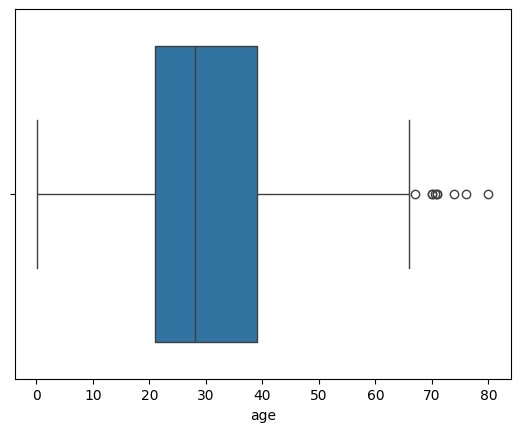

In [437]:
import seaborn as sns

series = df['age']
print(series)
sns.boxplot(x='age', data=df)

In [438]:
q1 = series.quantile(0.25)
q3 = series.quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
mask = (series < lower_bound) | (series > upper_bound)
df = df[~mask]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1296 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1296 non-null   int64  
 1   survived   1296 non-null   int64  
 2   sex        1296 non-null   object 
 3   age        1033 non-null   float64
 4   sibsp      1296 non-null   int64  
 5   parch      1296 non-null   int64  
 6   ticket     1296 non-null   int64  
 7   fare       1295 non-null   float64
 8   cabin      290 non-null    object 
 9   embarked   1294 non-null   object 
 10  boat       396 non-null    float64
 11  body       117 non-null    float64
 12  home.dest  738 non-null    object 
 13  title      1296 non-null   object 
dtypes: float64(4), int64(5), object(5)
memory usage: 151.9+ KB


<Axes: xlabel='age'>

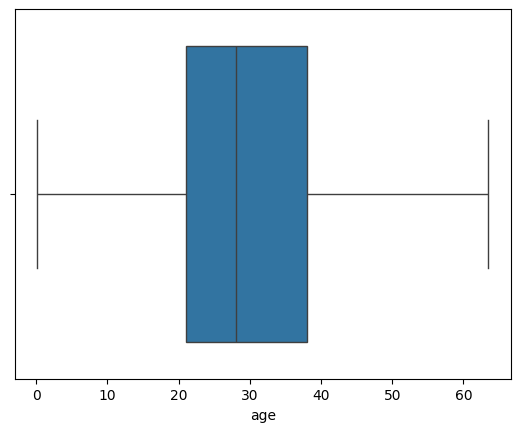

In [439]:
# put outliers in upper whisker
import numpy as np
series = df['age']
q1 = series.quantile(0.25)
q3 = series.quantile(0.75)
iqr = q3 - q1
upper_bound = q3 + 1.5 * iqr
df['age'] = np.where(df['age'] > upper_bound, upper_bound, df['age'])
sns.boxplot(x='age', data=df)

In [440]:
for col in df.columns:
    print(f"{col}: ", (df[col].isnull().sum() / df.shape[0]) * 100)

pclass:  0.0
survived:  0.0
sex:  0.0
age:  20.293209876543212
sibsp:  0.0
parch:  0.0
ticket:  0.0
fare:  0.07716049382716049
cabin:  77.62345679012346
embarked:  0.15432098765432098
boat:  69.44444444444444
body:  90.97222222222221
home.dest:  43.05555555555556
title:  0.0


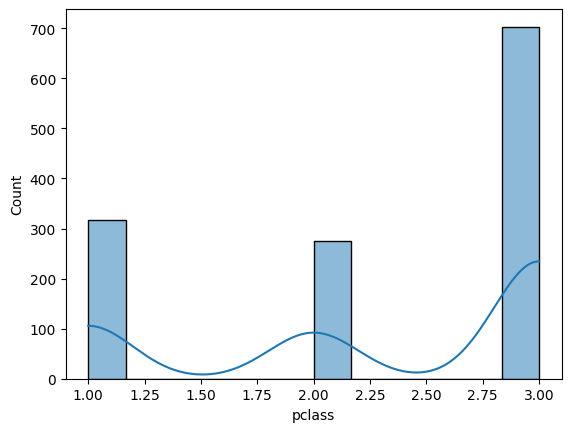

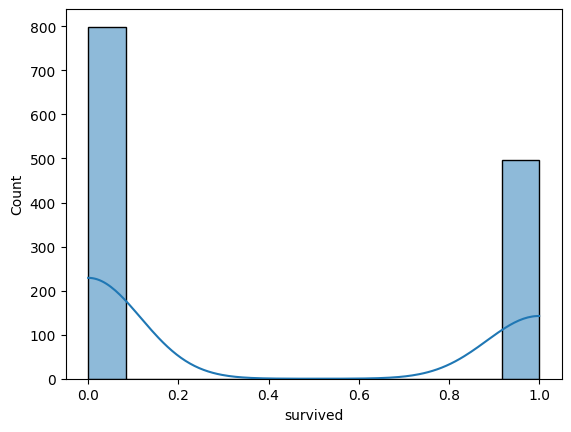

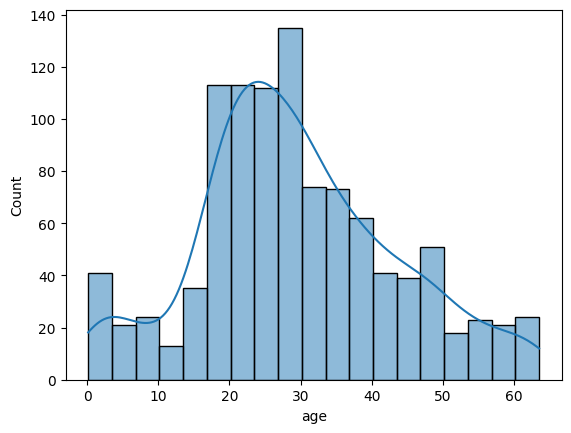

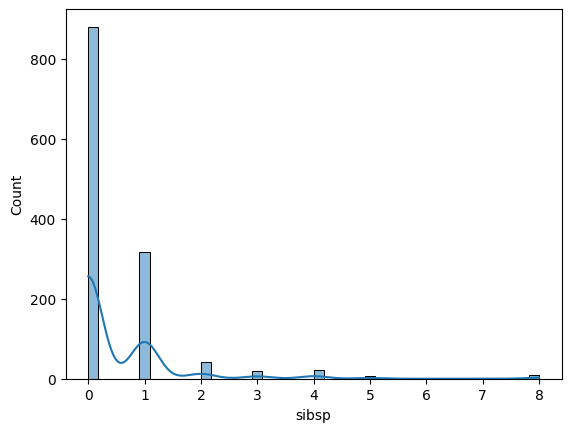

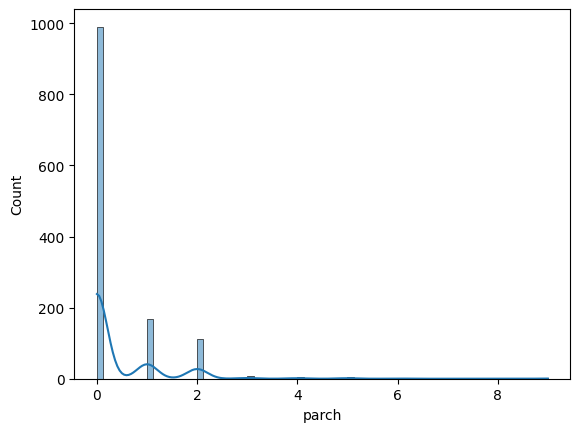

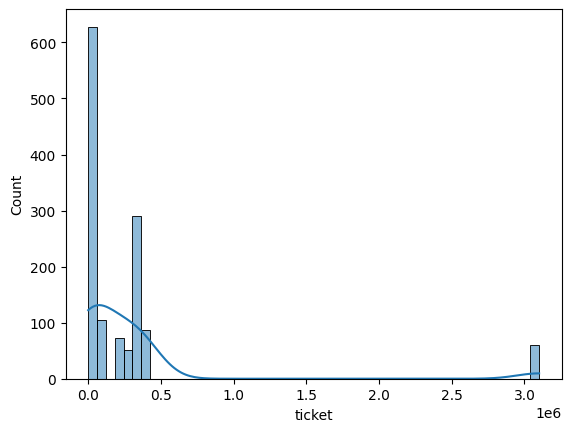

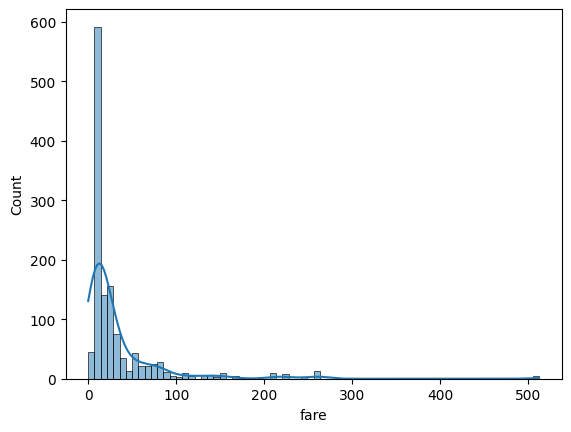

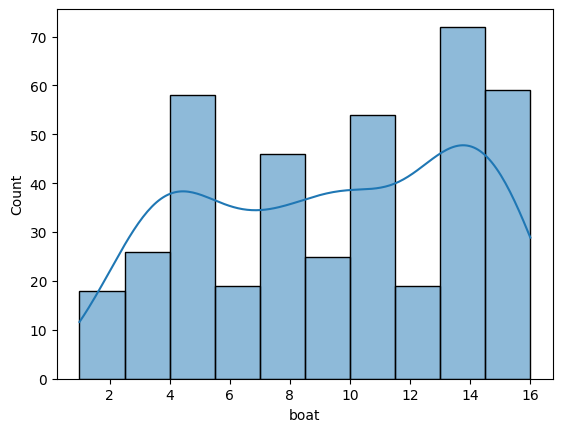

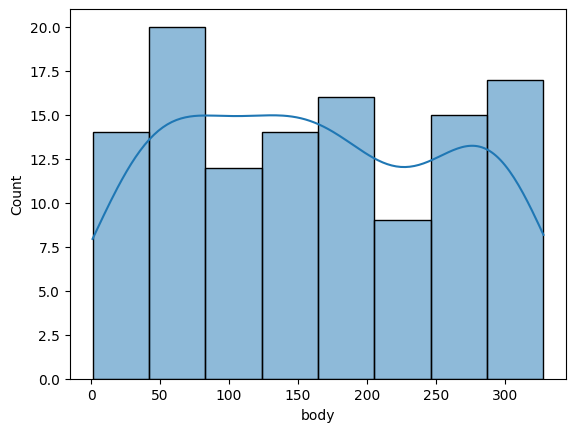

In [441]:
from matplotlib import pyplot as plt

for col in df.select_dtypes(include=['number']).columns:
    sns.histplot(data=df, x=col, kde=True)
    plt.show()

In [ ]:
df = df.drop(columns=['cabin', 'boat', 'body', 'home.dest', 'embarked', 'fare'])
print(df.info())
display(df['title'].value_counts())
display(df['sibsp'].value_counts())
df['title'].value_counts()

<class 'pandas.core.frame.DataFrame'>
Index: 1296 entries, 0 to 1308
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1296 non-null   int64  
 1   survived  1296 non-null   int64  
 2   sex       1296 non-null   object 
 3   age       1033 non-null   float64
 4   sibsp     1296 non-null   int64  
 5   parch     1296 non-null   int64  
 6   ticket    1296 non-null   int64  
 7   title     1296 non-null   object 
dtypes: float64(1), int64(5), object(2)
memory usage: 91.1+ KB
None


title
Mr              746
Miss            262
Mrs             197
Master           61
Dr                8
Rev               8
Col               4
Major             2
Ms                2
Lady              1
Sir               1
Jonkheer          1
Dona              1
Don               1
the Countess      1
Name: count, dtype: int64

sibsp
0    881
1    316
2     42
4     22
3     20
8      9
5      6
Name: count, dtype: int64

title
Mr              746
Miss            262
Mrs             197
Master           61
Dr                8
Rev               8
Col               4
Major             2
Ms                2
Lady              1
Sir               1
Jonkheer          1
Dona              1
Don               1
the Countess      1
Name: count, dtype: int64

In [375]:
col_with_nans = [col for col in df.columns if df[col].isna().sum() > 0]
num_cols = df[col_with_nans].select_dtypes(include=['number']).columns.tolist()
num_cols

['age']

In [ ]:
from sklearn.preprocessing import LabelBinarizer

binarizer = LabelBinarizer()
encoder = binarizer.fit_transform(df[['sex']])
df['ismale'] = encoder.squeeze()
df = df.drop(columns=['sex'])

In [ ]:
df['title'].unique()
def army_levels(title):
    if title == 'Col':
        return 1
    elif title == 'Major':
        return 2
    else:
        return 0
def nobility(noble):
    if noble in ['Dona', 'Jonkheer', 'the Countess', 'Don', 'Sir', 'Lady']:
        return 1
    else:
        return 0

df = df[df["title"] not in ['Dona', 'Jonkheer', 'the Countess', 'Don', 'Sir', 'Lady']]

df['army_levels'] = df['title'].apply(army_levels)
df['nobility_levels'] = df['title'].apply(nobility)

array(['Miss', 'Master', 'Mr', 'Mrs', 'Col', 'Dr', 'Major', 'Lady', 'Sir',
       'Dona', 'Jonkheer', 'the Countess', 'Don', 'Rev', 'Ms'],
      dtype=object)

In [ ]:
df = pd.get_dummies(df, columns=['title'], drop_first=True)
df.info()

In [379]:
# from lightgbm import LGBMRegressor

# for col in num_cols:
#     df_copy = df.copy()
#     nan_idx_labels = df_copy.index[df_copy[col].isna()]
#     df_copy['nan_idx'] = 0
#     df_copy.loc[nan_idx_labels, 'nan_idx'] = 1

#     train = df_copy[df_copy['nan_idx'] == 0]
#     test = df_copy[df_copy['nan_idx'] == 1]

#     X_train = train.drop(columns=[col, 'nan_idx'])
#     y_train = train[col]
#     X_test = test.drop(columns=[col, 'nan_idx'])

#     model = LGBMRegressor()
#     model.fit(X_train, y_train)
#     df.loc[nan_idx_labels, col] = model.predict(X_test)
# df.info()

In [380]:
df.isna().sum().sum()

np.int64(263)